In [18]:
# Tutoring myself with pytorch

import torch as t

x = t.rand(3, requires_grad = True)

y = x+2

z = y*y*2

z = z.mean()
y.retain_grad()
z.backward() # dz/dx

print(y.grad)

tensor([3.7199, 3.7495, 3.3422])


In [1]:
from imports import *

with open("data/pythia_val_data_b16.pkl", "rb") as f:
    val_dataloader = pickle.load(f)

model = LanguageModel("EleutherAI/pythia-70m", device_map = "cpu")
print(model)
# with model.trace(inputs["input_ids"]) as tracer:
    
#     output_mlp = model.gpt_neox.layers[0].mlp.dense_4h_to_h.output.grad.save()
#     output_attn = model.gpt_neox.layers[0].attention.dense.output.grad.save()
    
    
#     model.output.logits.sum().backward()

# print(output_mlp)
# print();print()
# print(output_attn)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since roneneldan/TinyStories couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/maheepchaudhary/.cache/huggingface/datasets/roneneldan___tiny_stories/default/0.0.0/f54c09fd23315a6f9c86f9dc80f725de7d8f9c64 (last modified on Sun Sep  8 14:32:36 2024).


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
model

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 10/21990 [01:26<52:49:14,  8.65s/it]


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

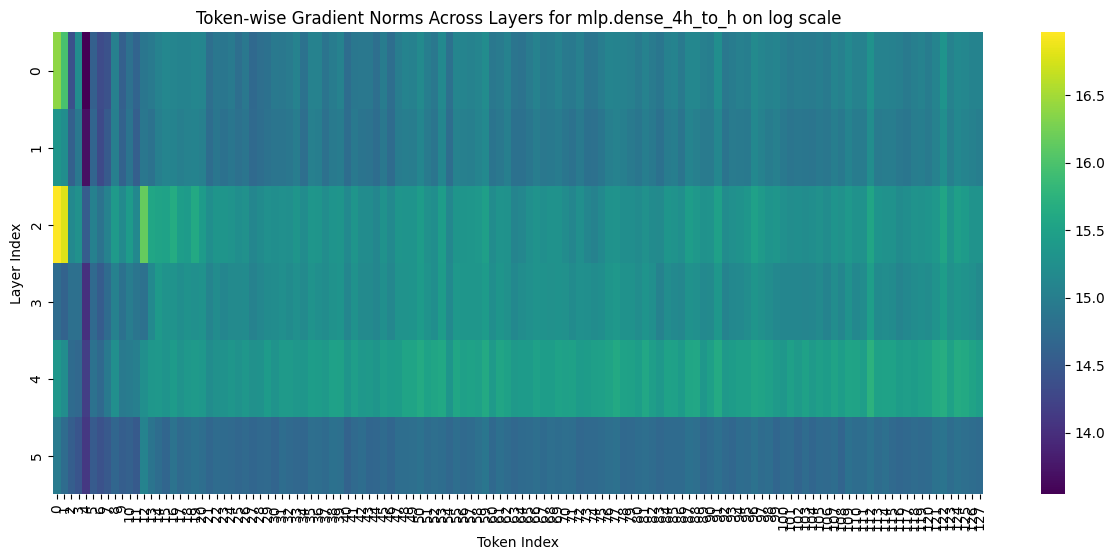

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token
data = load_dataset("roneneldan/TinyStories")
train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, return_tensors="pt")


# Define a list to store gradients per token


# Ensure the model is in evaluation mode
# model.eval()

final_data = []


for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)

    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)

    if index == 10:
        break


# Visualize the gradients using a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.savefig("Pythia_MLP_Grad_50_samples.png")
plt.close

'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 10/21990 [00:00<27:33, 13.29it/s]
/var/folders/_x/mkf1szd12yv28px5ztl_sjjr0000gn/T/ipykernel_93761/9358588.py:77: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 3 Axes> than <Figure size 1000x500 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(cax, ax=ax)


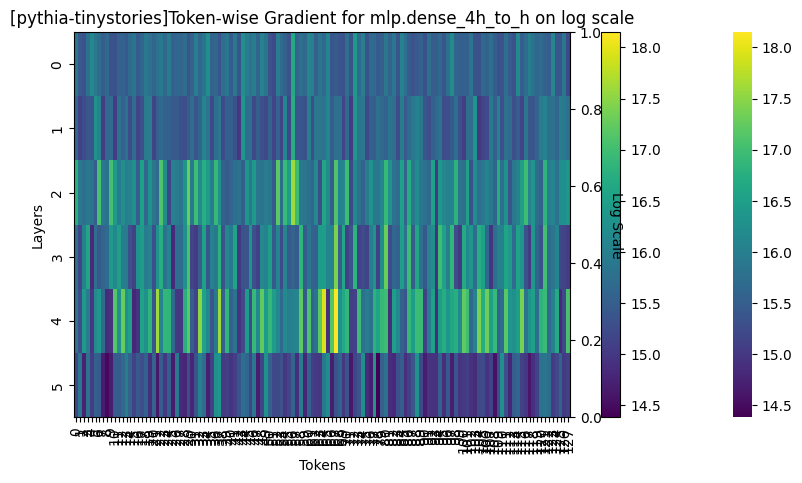

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, return_tensors="pt")


# Define a list to store gradients per token


# Ensure the model is in evaluation mode
# model.eval()

final_data = []


for index, sample in enumerate(tqdm(val_data["text"])):
    
    if index == 10:
        break
    
    token_gradients = []
    
    inputs = tokenizer(sample, return_tensors="pt", padding='max_length', max_length=128, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()

    model.zero_grad()  # Zero all gradients initially
    loss.backward(retain_graph=True)  # Backprop once for the whole batch
    
    mlp_layers = [model.gpt_neox.layers[i].mlp.dense_4h_to_h for i in range(6)]

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  
        # Collect the gradient for each MLP layer
        gradients = []
        for layer in mlp_layers:
            param_grad = layer.weight.grad[token_idx].view(-1)  # Get the gradient for this token
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient

        # Stack gradients for the token
        token_gradients.append(torch.cat(gradients, dim=0))  

    # Convert to tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))

    final_data.append(average_gradients_tensor.cpu())


# Visualize the gradients using a heatmap
# plt.figure(figsize=(15, 6))
# sns.heatmap(np.mean(np.array(final_data), axis=0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
# plt.xlabel('Token Index')
# plt.ylabel('Layer Index')
# plt.title(f'[pythia-tinystories]Token-wise Gradient for mlp.dense_4h_to_h on log scale')
# plt.show()

fig, ax = plt.subplots(figsize=(10, 5))  # Set figure size
cax = ax.imshow(np.mean(np.array(final_data), axis = 0).T, aspect='auto', cmap='viridis')  # Choose a color map like 'viridis', 'plasma', etc.

# Add color bar to indicate the scale
cbar = fig.colorbar(cax, ax=ax)

# Set labels
ax.set_xlabel('Tokens')
ax.set_ylabel('Layers')

# Add labels to the right side (create twin axes sharing the same y-axis)
ax_right = ax.twinx()  
ax_right.set_ylabel('Log Scale', rotation=-90, labelpad=15)

# Optionally, you can add titles
plt.title(f'[pythia-tinystories]Token-wise Gradient for mlp.dense_4h_to_h on log scale')

# Show the heatmap
plt.show()
plt.close()


/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 0/21990 [00:00<?, ?it/s]

torch.Size([1, 128, 50304])


  0%|          | 1/21990 [00:05<34:38:30,  5.67s/it]

(1, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 2/21990 [00:11<34:20:10,  5.62s/it]

(2, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 3/21990 [00:16<33:39:39,  5.51s/it]

(3, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 4/21990 [00:22<33:53:25,  5.55s/it]

(4, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 5/21990 [00:27<33:44:50,  5.53s/it]

(5, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 6/21990 [00:33<33:32:29,  5.49s/it]

(6, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 7/21990 [00:38<33:09:46,  5.43s/it]

(7, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 8/21990 [00:43<32:57:02,  5.40s/it]

(8, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 9/21990 [00:49<32:50:51,  5.38s/it]

(9, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 10/21990 [00:54<32:51:43,  5.38s/it]

(10, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 11/21990 [00:59<32:52:29,  5.38s/it]

(11, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 12/21990 [01:05<32:59:51,  5.41s/it]

(12, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 13/21990 [01:11<33:34:49,  5.50s/it]

(13, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 14/21990 [01:16<33:35:21,  5.50s/it]

(14, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 15/21990 [01:22<33:52:25,  5.55s/it]

(15, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 16/21990 [01:27<33:47:12,  5.54s/it]

(16, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 17/21990 [01:33<33:36:16,  5.51s/it]

(17, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 18/21990 [01:38<33:23:00,  5.47s/it]

(18, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 19/21990 [01:43<33:10:10,  5.43s/it]

(19, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 20/21990 [01:49<33:01:04,  5.41s/it]

(20, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 21/21990 [01:54<32:48:03,  5.38s/it]

(21, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 22/21990 [01:59<32:34:36,  5.34s/it]

(22, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 23/21990 [02:05<32:32:18,  5.33s/it]

(23, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 24/21990 [02:10<32:31:39,  5.33s/it]

(24, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 25/21990 [02:15<32:28:10,  5.32s/it]

(25, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 26/21990 [02:21<32:29:00,  5.32s/it]

(26, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 27/21990 [02:26<32:23:12,  5.31s/it]

(27, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 28/21990 [02:31<32:44:01,  5.37s/it]

(28, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 29/21990 [02:37<32:46:07,  5.37s/it]

(29, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 30/21990 [02:42<32:45:48,  5.37s/it]

(30, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 31/21990 [02:47<32:41:57,  5.36s/it]

(31, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 32/21990 [02:53<32:34:35,  5.34s/it]

(32, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 33/21990 [02:58<32:36:04,  5.35s/it]

(33, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 34/21990 [03:03<32:34:13,  5.34s/it]

(34, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 35/21990 [03:09<32:37:38,  5.35s/it]

(35, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 36/21990 [03:14<32:50:04,  5.38s/it]

(36, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 37/21990 [03:20<32:54:16,  5.40s/it]

(37, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 38/21990 [03:25<32:48:15,  5.38s/it]

(38, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 39/21990 [03:30<32:44:36,  5.37s/it]

(39, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 40/21990 [03:36<32:40:42,  5.36s/it]

(40, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 41/21990 [03:41<32:45:18,  5.37s/it]

(41, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 42/21990 [03:46<32:43:02,  5.37s/it]

(42, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 43/21990 [03:52<32:47:44,  5.38s/it]

(43, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 44/21990 [03:57<32:46:58,  5.38s/it]

(44, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 45/21990 [04:03<32:43:44,  5.37s/it]

(45, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 46/21990 [04:08<32:39:26,  5.36s/it]

(46, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 47/21990 [04:13<32:41:48,  5.36s/it]

(47, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 48/21990 [04:19<32:55:08,  5.40s/it]

(48, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 49/21990 [04:24<32:47:41,  5.38s/it]

(49, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 50/21990 [04:30<32:49:41,  5.39s/it]

(50, 128, 6)
torch.Size([1, 128, 50304])


  0%|          | 50/21990 [04:35<33:34:40,  5.51s/it]

(51, 128, 6)


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

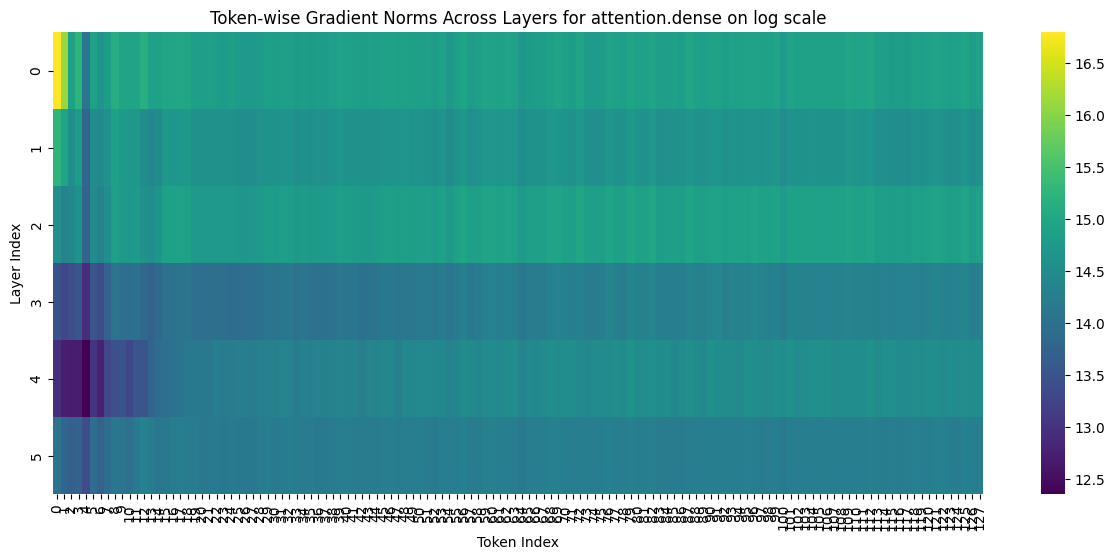

: 

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, return_tensors="pt")


# Define a list to store gradients per token


# Ensure the model is in evaluation mode
# model.eval()

final_data = []


for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    print(logits.shape)

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)

    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)

    print(np.array(final_data).shape)

    if index == 50:
        break


# Visualize the gradients using a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for attention.dense on log scale')
plt.savefig("Pythia_Attention_Grad_50_samples.png")
plt.close